# Mask R-CNN - Inspect Nuclei Training Data
Inspect and visualize data loading and pre-processing code.

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import skimage.draw

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.nuclei import nuclei

%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Configurations

Configurations are defined in balloon.py

In [3]:
config = nuclei.NucleiConfig()
NUCLEI_DIR = "/allen/programs/celltypes/workgroups/em-connectomics/gayathrim/nuclei_segmentation/data"

In [4]:
dataset = nuclei.NucleiDataset()
dataset.load_nucleus(NUCLEI_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 4000
Class Count: 2
  0. BG                                                
  1. nucleus                                           


In [5]:
print(dataset.image_ids)
print(dataset.class_ids)

[   0    1    2 ... 3997 3998 3999]
[0 1]


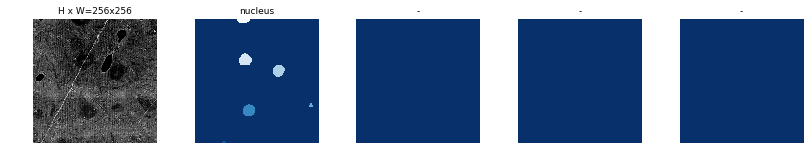

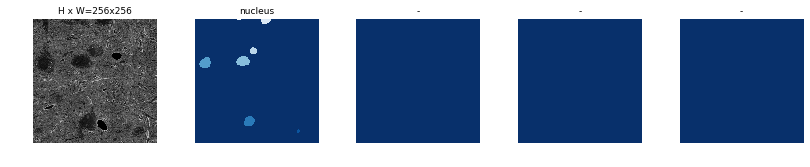

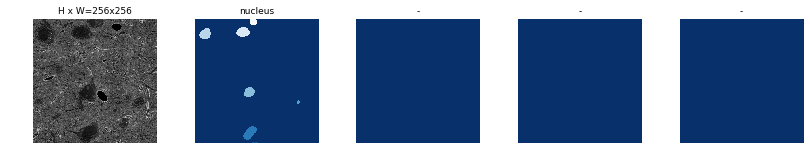

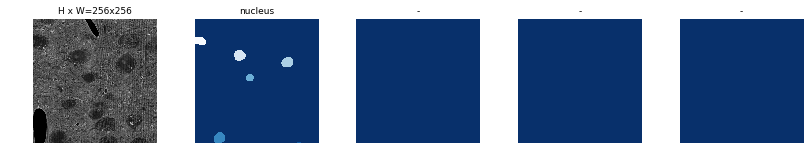

In [12]:

# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

{'path': '/allen/programs/celltypes/workgroups/em-connectomics/gayathrim/nuclei_segmentation/data/images/data_13_123.png', 'source': 'nuclei', 'id': 'data_13_123.png'}
image_id  1249 /allen/programs/celltypes/workgroups/em-connectomics/gayathrim/nuclei_segmentation/data/images/data_13_123.png
image                    shape: (256, 256, 3)         min:   24.00000  max:  223.00000  uint8
mask                     shape: (256, 256, 11)        min:    0.00000  max:    1.00000  uint8
class_ids                shape: (11,)                 min:    1.00000  max:    1.00000  int32
bbox                     shape: (11, 4)               min:    0.00000  max:  255.00000  int32


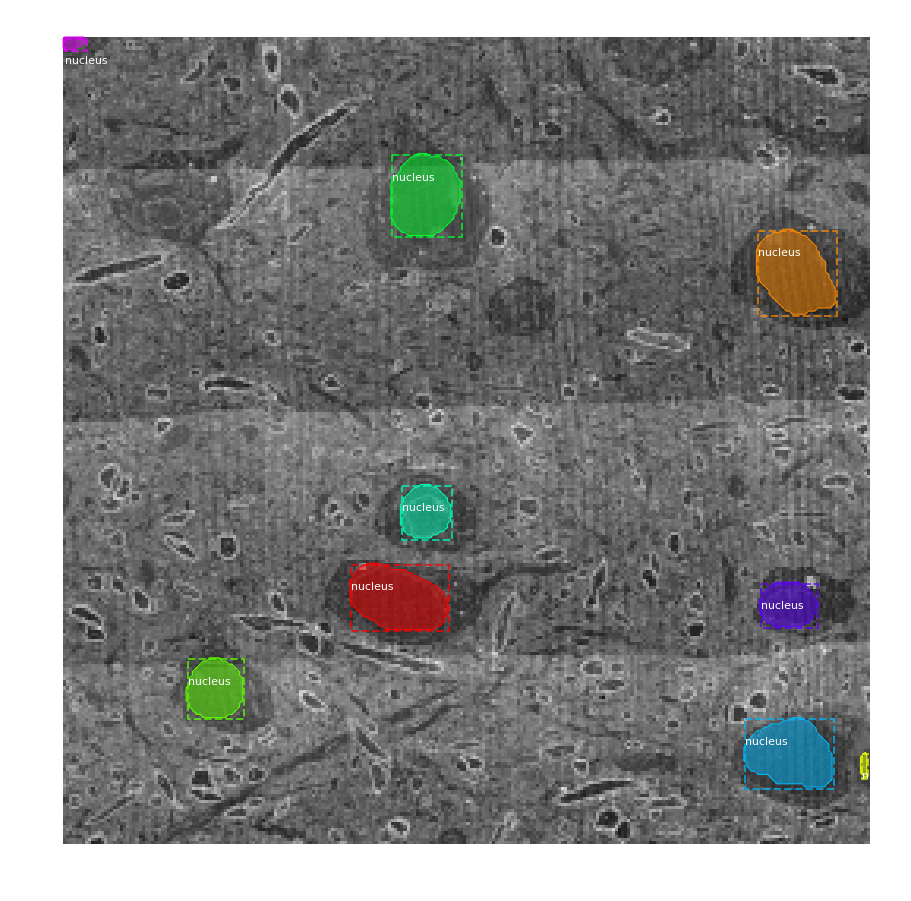

In [13]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)